In [1]:
#Hackathon Subject 1: *Optimizing Bank Marketing Strategies for Customer Acquisition*
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Fetch the dataset with the correct delimiter
df = pd.read_csv('bank-full.csv', delimiter=';')

# Preview the dataset
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [2]:
#structure of the dataset
df.info()

##statistical summary
df.describe()

#missing values
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB
age          0
job          0
marital      0
education    0
default      0
balance      0
housing  

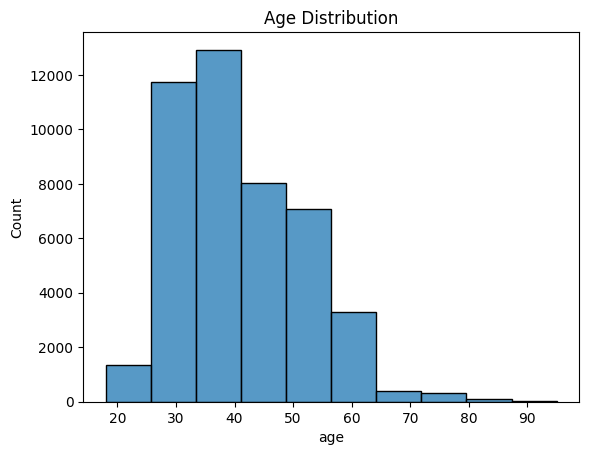

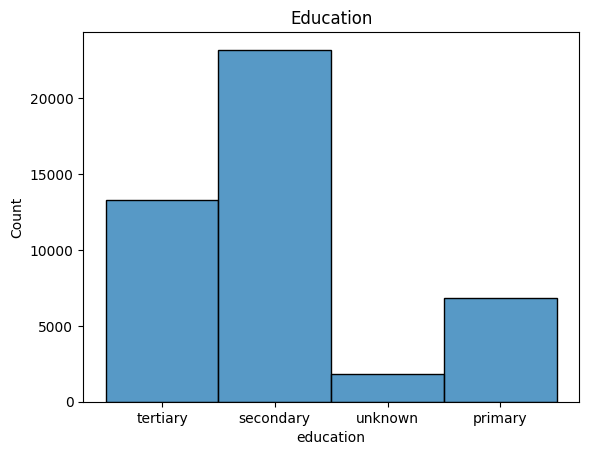

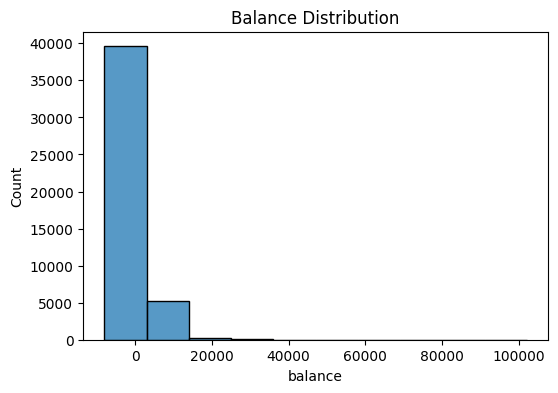

In [3]:
#1. Customer Segmentation
#Perform a detailed segmentation analysis based on demographic factors, customer behavior, and financial history

# Age distribution
sns.histplot(df['age'], bins=10)
plt.title('Age Distribution')
plt.show()
#With this chart we notice that most customers are between 30 and 40 years old

# Education
sns.histplot(df['education'], bins=10)
plt.title('Education')
plt.show()
#With this chart we notice that the majority of customers went to secondary school

# Balance distribution
plt.figure(figsize=(6, 4))
sns.histplot(df['balance'], bins=10)
plt.title('Balance Distribution')
plt.show()
#average yearly balance, in euros (numeric) 
#We notice that the majority of customers do not have a loan

In [4]:
#Drop rows with missing values
df = df.dropna()
df_encoded = pd.get_dummies(df, drop_first=True)

<Figure size 1500x400 with 0 Axes>

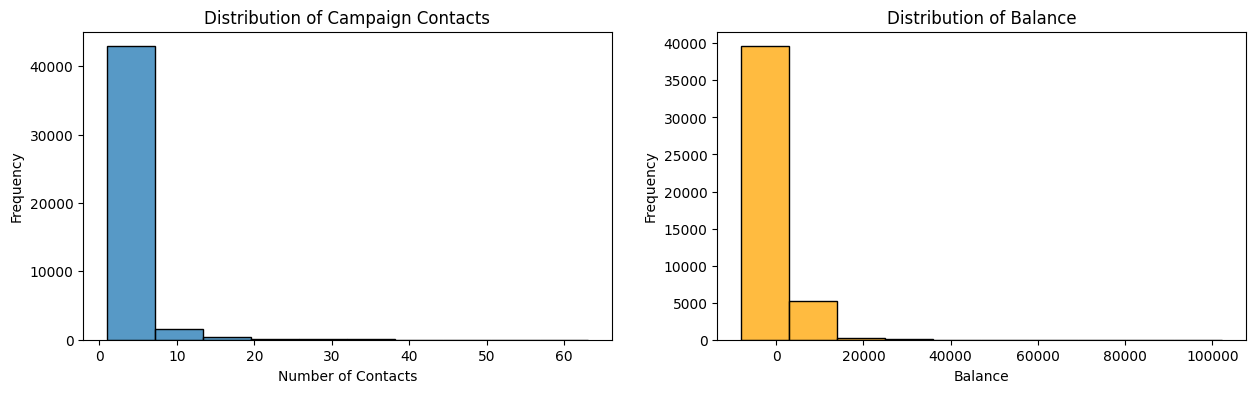

In [5]:
#1. Customer Segmentation
#Identify distinct customer segments and understand their response patterns to past marketing campaigns.

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 4))

fig, axs = plt.subplots(1, 2, figsize=(15, 4))

# Plot 1: Histogram of 'campaign' (number of contacts performed during the campaign)
sns.histplot(df['campaign'], bins=10, ax=axs[0])
axs[0].set_title('Distribution of Campaign Contacts')
axs[0].set_xlabel('Number of Contacts')
axs[0].set_ylabel('Frequency')

# Plot 2: Histogram of 'balance' (average yearly balance)
sns.histplot(df['balance'], bins=10, ax=axs[1], color='orange')
axs[1].set_title('Distribution of Balance')
axs[1].set_xlabel('Balance')
axs[1].set_ylabel('Frequency')

plt.show()

#We can see the similarity here, the campaign has been made mostly on customers who does not have loans (average yearly balance)

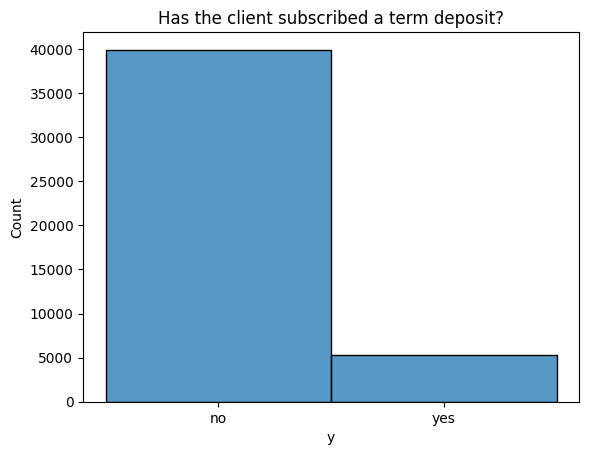

In [6]:
#2. Campaign Effectiveness Analysis:
#Evaluate the effectiveness of previous marketing campaigns by analyzing conversion rates, response rates, and other relevant metrics.

#First we are going to see the output variable (desired target):
sns.histplot(df['y'], bins=10)
plt.title('Has the client subscribed a term deposit?')
plt.show()
#We notice that most customers have not subscribed to a term deposit

In [7]:
#2. Campaign Effectiveness Analysis:
#Identify the most successful campaigns and understand the characteristics of customers who responded positively.

# Overall conversion rate
conversion_rate = df['y'].value_counts(normalize=True)['yes'] * 100
print(f"Overall Conversion Rate: {conversion_rate:.2f}%")

#11.70% of customers who were contacted during the campaign successfully subscribed to the product which is not that much

Overall Conversion Rate: 11.70%


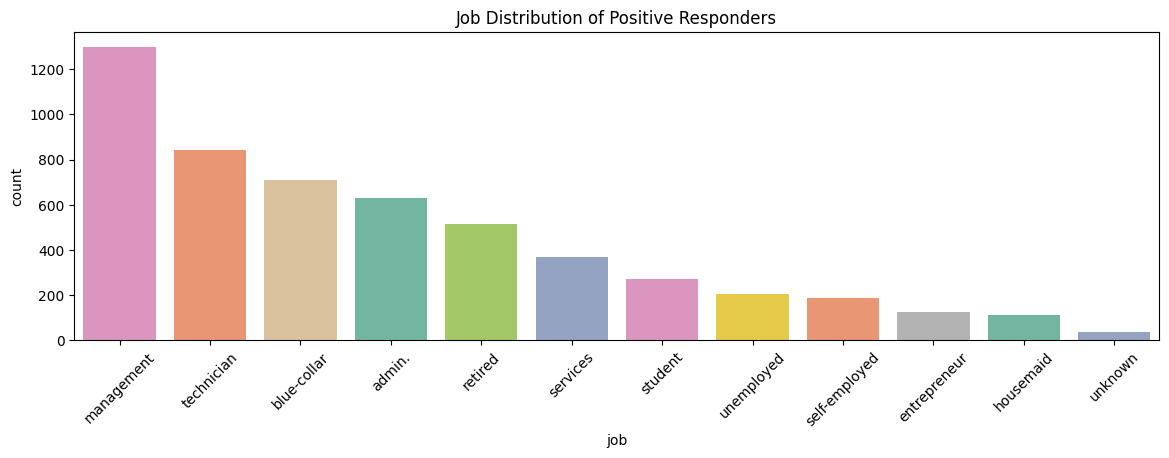

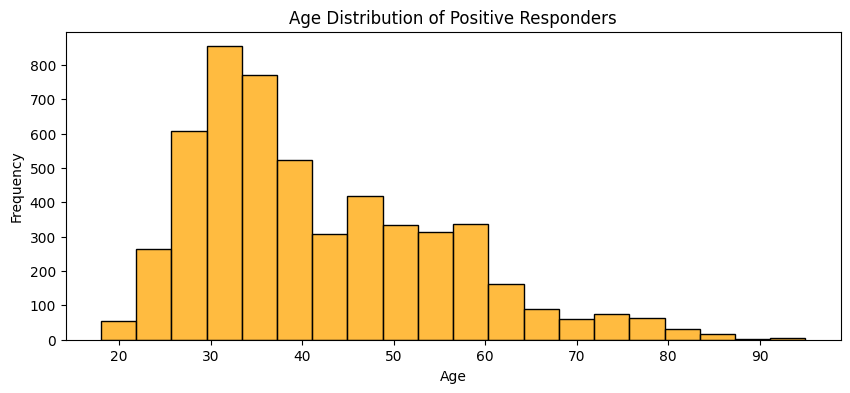

In [8]:
# Filter the DataFrame for customers who responded positively
positive_responders = df[df['y'] == 'yes']

# Plot demographic factors of positive responders
plt.figure(figsize=(14, 4))
sns.countplot(data=positive_responders, x='job', hue='job', order=positive_responders['job'].value_counts().index, palette='Set2', dodge=False, legend=False)
plt.title('Job Distribution of Positive Responders')
plt.xticks(rotation=45)
plt.show()
#The majority of positive responders have management jobs so maybe higher incomes

# Response by age
plt.figure(figsize=(10, 4))
sns.histplot(positive_responders['age'], bins=20, color='orange')
plt.title('Age Distribution of Positive Responders')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()
#The majority of positive responders are young between 30 and 40

In [9]:
#3. Predictive Modeling:
#Build predictive models to forecast the likelihood of customer response to future marketing campaigns.

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

#Preprocess the Data
X = df.drop('y', axis=1)
y = df['y'].apply(lambda x: 1 if x == 'yes' else 0)

categorical_features = X.select_dtypes(include=['object']).columns

# Create a preprocessor for One-Hot Encoding categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough'  # Leave numeric features unchanged
)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [ ]:
#Train the Logistic Regression Model
from sklearn.linear_model import LogisticRegression

# Create a pipeline that includes preprocessing and the Logistic Regression model
logreg_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                  ('classifier', LogisticRegression(max_iter=1000, random_state=42))])

# Train the model
logreg_pipeline.fit(X_train, y_train)

In [11]:
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix

# Make predictions on the test set
y_pred = logreg_pipeline.predict(X_test)
y_prob = logreg_pipeline.predict_proba(X_test)[:, 1]

# Evaluate the model
print("Logistic Regression Performance:")
print(classification_report(y_test, y_pred))

# Calculate ROC-AUC score
roc_auc = roc_auc_score(y_test, y_prob)
print(f"ROC-AUC Score: {roc_auc:.2f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

#The 1 class is important because it represents customers who respond positively to the marketing campaign

Logistic Regression Performance:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95     11966
           1       0.64      0.34      0.44      1598

    accuracy                           0.90     13564
   macro avg       0.78      0.66      0.69     13564
weighted avg       0.88      0.90      0.89     13564

ROC-AUC Score: 0.90
Confusion Matrix:
[[11669   297]
 [ 1060   538]]


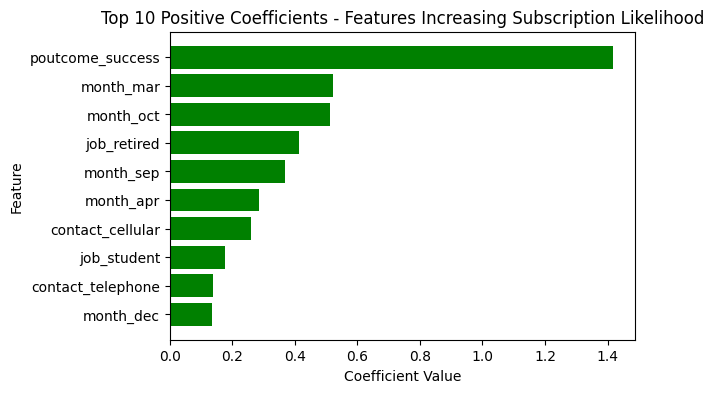

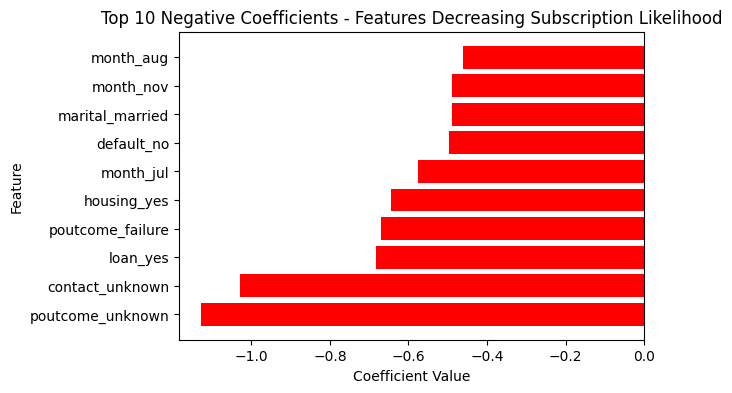

In [12]:
#3. Predictive Modeling:
#Explore machine learning algorithms to predict which customers are more likely to subscribe to a product or service.

# Extract the feature names after One-Hot Encoding
ohe_feature_names = logreg_pipeline.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out(categorical_features)
numeric_features = X.select_dtypes(exclude=['object']).columns
all_feature_names = np.concatenate([ohe_feature_names, numeric_features])

# Get the coefficients from the logistic regression model
coefficients = logreg_pipeline.named_steps['classifier'].coef_[0]

# Creating a DataFrame for better visualization
coef_df = pd.DataFrame({
    'Feature': all_feature_names,
    'Coefficient': coefficients
}).sort_values(by='Coefficient', ascending=False)

# Extract the top 10 positive and negative coefficients
top_positive_coefficients = coef_df.head(10)
top_negative_coefficients = coef_df.tail(10)

# Plot the top positive coefficients
plt.figure(figsize=(6, 4))
plt.barh(top_positive_coefficients['Feature'], top_positive_coefficients['Coefficient'], color='green')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Top 10 Positive Coefficients - Features Increasing Subscription Likelihood')
plt.gca().invert_yaxis()
plt.show()

# Plot the top negative coefficients
plt.figure(figsize=(6, 4))
plt.barh(top_negative_coefficients['Feature'], top_negative_coefficients['Coefficient'], color='red')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Top 10 Negative Coefficients - Features Decreasing Subscription Likelihood')
plt.gca().invert_yaxis()
plt.show()


In [13]:
#4. Feature Importance and Interpretability

#Interpret the Impact of Each Feature

# Duration (Positive Influence):
# Interpretation: Longer call durations are associated with a higher likelihood of subscription. This suggests that customers who engage more in conversations are more likely to subscribe.
# Recommendation: Train sales teams to focus on maintaining engaging conversations with potential customers. Perhaps introduce techniques to keep the customer on the call longer by addressing their concerns in detail.

# Previous (Negative Influence):
# Interpretation: Customers who have been contacted many times in the past are less likely to subscribe. This could indicate fatigue or frustration with repeated marketing efforts.
# Recommendation: Refine targeting strategies to avoid repeatedly contacting the same individuals. Focus on quality over quantity by segmenting the audience more effectively.

# Contact Method (e.g., Cellular or Telephone):
# Interpretation: Different contact methods may influence subscription likelihood. For example, contacting customers via cellular might be more effective than using a landline.
# Recommendation: Optimize the communication channels used based on customer preferences and behaviors. Prioritize the most effective channels for outreach.

# Education Level:
# Interpretation: Customers with certain education levels may respond more positively to marketing campaigns. For instance, tertiary education might be a positive influencer.
# Recommendation: Tailor messaging to resonate with the educational background of your target audience. For highly educated customers, more detailed and analytical content might be effective.

# Housing Loan (Negative Influence):
# Interpretation: Customers with housing loans might be less likely to subscribe to additional financial products due to existing financial commitments.
# Recommendation: Develop specialized offers or messaging for customers with existing financial obligations, perhaps focusing on how your product can complement or alleviate their financial situation.
